In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data,test_lables) = reuters.load_data(num_words=10000)
num_classes = max(train_labels) + 1
print(f" Number of news categories (classes): {num_classes}")

 Number of news categories (classes): 46


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_newswire_length = 200
train_data = pad_sequences(train_data, maxlen=max_newswire_length, padding='post', truncating='post')
test_data = pad_sequences(test_data, maxlen=max_newswire_length, padding = 'post', truncating='post')
print(f"Train new data shape: {train_data.shape}")
print(f"Train labels (one-hot) shape: {train_labels_one_hot.shape}")
print(f"Example of prepped news wire (first 10 word id's) : {train_data[0][:10]}")


Train new data shape: (8982, 200)
Train labels (one-hot) shape: (8982, 46)
Example of prepped news wire (first 10 word id's) : [  1   2   2   8  43  10 447   5  25 207]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.utils import to_categorical
vocab_size = 10000
embedding_dim = 128
num_classes = max(train_labels) + 1
train_labels_one_hot = to_categorical(train_labels, num_classes=num_classes)
test_labels_one_hot = to_categorical(test_lables, num_classes=num_classes)
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_newswire_length),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, epochs=20, batch_size=64,
                    validation_split=0.2, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.3586 - loss: 2.8402 - val_accuracy: 0.4552 - val_loss: 2.0896
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4929 - loss: 2.0066 - val_accuracy: 0.5648 - val_loss: 1.7596
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5957 - loss: 1.6912 - val_accuracy: 0.6394 - val_loss: 1.5357
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.6605 - loss: 1.4642 - val_accuracy: 0.6806 - val_loss: 1.3806
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6945 - loss: 1.3199 - val_accuracy: 0.6978 - val_loss: 1.2626
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.7236 - loss: 1.1551 - val_accuracy: 0.7346 - val_loss: 1.1801
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.7660 - loss: 1.0040 - val_accuracy: 0.7385 - val_loss: 1.1477
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7749 - loss: 0.9704 - val_accu

In [ ]:
loss, accuracy = model.evaluate(test_data, test_labels_one_hot, verbose=2)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")


71/71 - 0s - 4ms/step - accuracy: 0.7907 - loss: 0.9725
Test loss: 0.9725
Test accuracy: 0.7907


step-6: Visualizing Training Progress....
-----------------------------

Plots displayed. Observe how the training and validation lines behave.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
 Actual category for the first test news wire (ID): 3
 Model's predicted category (ID): 3
Confidence for predictedcategory:0.9853


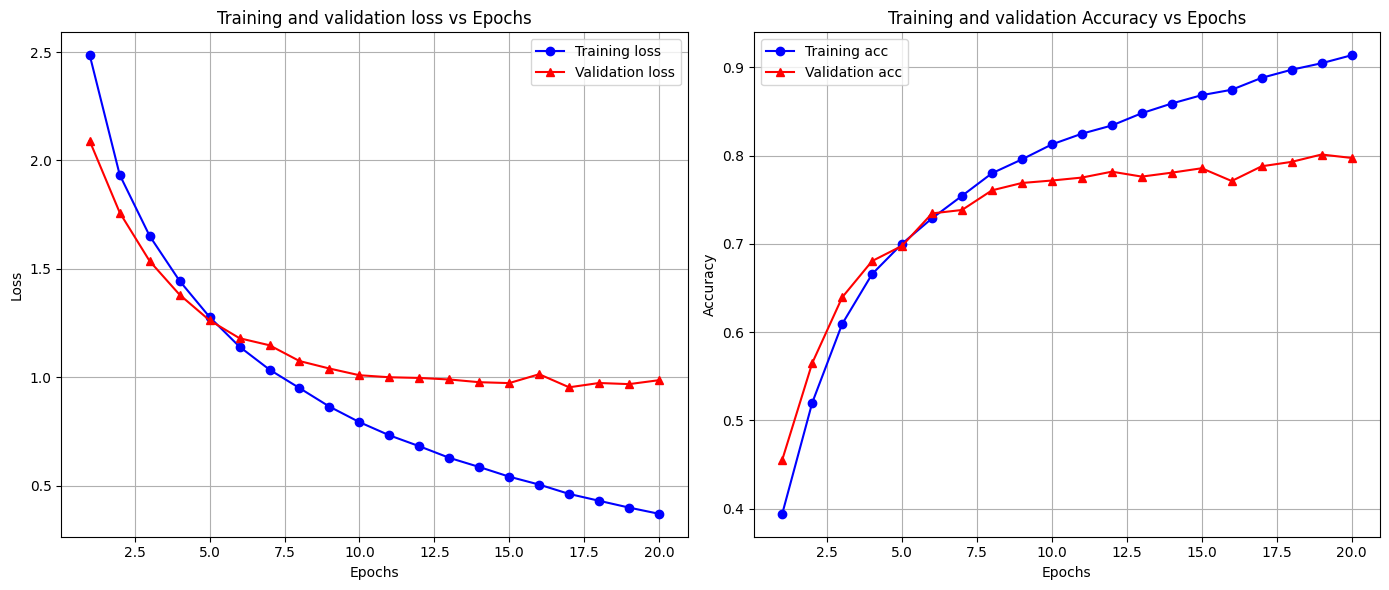

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
print("step-6: Visualizing Training Progress....")
print("-----------------------------")
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'r^-', label='Validation loss')
plt.title('Training and validation loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'r^-', label='Validation acc')
plt.title('Training and validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show
print("\nPlots displayed. Observe how the training and validation lines behave.")
sample_newswire_for_prediction = test_data[46:47]
true_category_label = test_lables[46]
prediction_probabilities = model.predict(sample_newswire_for_prediction)[0]
predicted_category = np.argmax(prediction_probabilities)
print(f" Actual category for the first test news wire (ID): {true_category_label}")
print(f" Model's predicted category (ID): {predicted_category}")
print(f"Confidence for predictedcategory:{prediction_probabilities[predicted_category]:.4f}")